In [ ]:
from pytz import utc
from datetime import datetime, timedelta
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from time_series_model_validation import get_even_validation_folds, \
    get_training_folds_for_sliding_window, train_and_evaluate_model_on_folds, reindex_dataframe_with_regular_timestamps
from pv_production_forecast import prepare_pv_production_data, prepare_sun_position_data, prepare_weather_data

In [ ]:
latitude1 = 59.454771
longitude1 = 24.836434
latitude2 = 59.381767
longitude2 = 24.638892

In [ ]:
folder = "../../data/"

In [ ]:
pv_prod1 = prepare_pv_production_data(folder, id1, max_fixes=15)
pv_prod1 = pv_prod1[:"2023-06-22"]
pv_prod1.head()

,pv_production
dateHour,
2023-02-21 16:00:00+00:00,-0.08
2023-02-21 17:00:00+00:00,-0.09
2023-02-21 18:00:00+00:00,-0.08
2023-02-21 19:00:00+00:00,-0.09
2023-02-21 20:00:00+00:00,-0.08


In [ ]:
pv_prod2 = prepare_pv_production_data(folder, id2, max_fixes=15)
pv_prod2 = pv_prod2[:"2023-06-22"]
pv_prod2.head()

,pv_production
dateHour,
2023-02-21 16:00:00+00:00,-0.05
2023-02-21 17:00:00+00:00,-0.06
2023-02-21 18:00:00+00:00,-0.05
2023-02-21 19:00:00+00:00,-0.05
2023-02-21 20:00:00+00:00,-0.05


In [51]:
meteo1 = prepare_weather_data(folder, id1, pv_prod1.index)
meteo1.head()

,temperature_2m (°C),cloudcover (%),total_irradiance (W/m²)
time,,,
2023-02-21 16:00:00+00:00,-6.3,100.0,2.0
2023-02-21 17:00:00+00:00,-6.4,100.0,0.0
2023-02-21 18:00:00+00:00,-6.5,100.0,0.0
2023-02-21 19:00:00+00:00,-5.9,100.0,0.0
2023-02-21 20:00:00+00:00,-6.1,100.0,0.0


In [52]:
meteo2 = prepare_weather_data(folder, id2, pv_prod2.index)
meteo2.head()

,temperature_2m (°C),cloudcover (%),total_irradiance (W/m²)
time,,,
2023-02-21 16:00:00+00:00,-6.4,100.0,2.0
2023-02-21 17:00:00+00:00,-6.6,100.0,0.0
2023-02-21 18:00:00+00:00,-6.8,100.0,0.0
2023-02-21 19:00:00+00:00,-6.3,100.0,0.0
2023-02-21 20:00:00+00:00,-6.6,100.0,0.0


In [53]:
sun_pos1 = prepare_sun_position_data(pv_prod1.index, latitude1, longitude1)
sun_pos1.head()

,Azimuth (°),Elevation (°)
dateHour,,
2023-02-21 16:00:00+00:00,257.33,-4.68
2023-02-21 17:00:00+00:00,270.15,-12.34
2023-02-21 18:00:00+00:00,283.35,-19.86
2023-02-21 19:00:00+00:00,297.45,-26.97
2023-02-21 20:00:00+00:00,312.93,-33.17


In [54]:
sun_pos2 = prepare_sun_position_data(pv_prod2.index, latitude2, longitude2)
sun_pos2.head()

,Azimuth (°),Elevation (°)
dateHour,,
2023-02-21 16:00:00+00:00,257.15,-4.55
2023-02-21 17:00:00+00:00,269.96,-12.24
2023-02-21 18:00:00+00:00,283.15,-19.78
2023-02-21 19:00:00+00:00,297.22,-26.91
2023-02-21 20:00:00+00:00,312.68,-33.14


In [55]:
dataset1 = meteo1.join(sun_pos1)
dataset1.head()

,temperature_2m (°C),cloudcover (%),total_irradiance (W/m²),Azimuth (°),Elevation (°)
time,,,,,
2023-02-21 16:00:00+00:00,-6.3,100.0,2.0,257.33,-4.68
2023-02-21 17:00:00+00:00,-6.4,100.0,0.0,270.15,-12.34
2023-02-21 18:00:00+00:00,-6.5,100.0,0.0,283.35,-19.86
2023-02-21 19:00:00+00:00,-5.9,100.0,0.0,297.45,-26.97
2023-02-21 20:00:00+00:00,-6.1,100.0,0.0,312.93,-33.17


In [56]:
dataset2 = meteo2.join(sun_pos2)
dataset2.head()

,temperature_2m (°C),cloudcover (%),total_irradiance (W/m²),Azimuth (°),Elevation (°)
time,,,,,
2023-02-21 16:00:00+00:00,-6.4,100.0,2.0,257.15,-4.55
2023-02-21 17:00:00+00:00,-6.6,100.0,0.0,269.96,-12.24
2023-02-21 18:00:00+00:00,-6.8,100.0,0.0,283.15,-19.78
2023-02-21 19:00:00+00:00,-6.3,100.0,0.0,297.22,-26.91
2023-02-21 20:00:00+00:00,-6.6,100.0,0.0,312.68,-33.14


In [94]:
warnings.filterwarnings('ignore')

maes1 = {}
maes2 = {}
val_lengths = range(2, 21, 2)
for val_length in val_lengths:
    print(val_length)
    maes1[val_length] = []
    maes2[val_length] = []
    for train_len in range(2, 10, 3):
        for start_day in range(1, 31, 5):
            val_folds = get_even_validation_folds(dataset1.index, 8, timedelta(days=val_length), datetime(2023, 3, start_day, tzinfo=utc))
            train_folds = get_training_folds_for_sliding_window(dataset1.index, val_folds, timedelta(days=train_len))
            #print("Model for any horizon, no past production in input data")
            mae = train_and_evaluate_model_on_folds(dataset1, pv_prod1.squeeze(), RandomForestRegressor(n_estimators=10, n_jobs=-1), train_folds, val_folds, mean_absolute_error).mean().values[0]
            maes1[val_length].append(mae)
            #print("Mean absolute error on validation sets: " + str(mae))
    
            val_folds = get_even_validation_folds(dataset2.index, 8, timedelta(days=val_length), datetime(2023, 3, start_day, tzinfo=utc))
            train_folds = get_training_folds_for_sliding_window(dataset2.index, val_folds, timedelta(days=train_len))
            #print("Model for any horizon, no past production in input data")
            mae = train_and_evaluate_model_on_folds(dataset2, pv_prod2.squeeze(), RandomForestRegressor(n_estimators=10, n_jobs=-1), train_folds, val_folds, mean_absolute_error).mean().values[0]
            maes2[val_length].append(mae)
            #print("Mean absolute error on validation sets: " + str(mae))
    
warnings.filterwarnings("default")

2
4
6
8
10
12
14
16
18
20


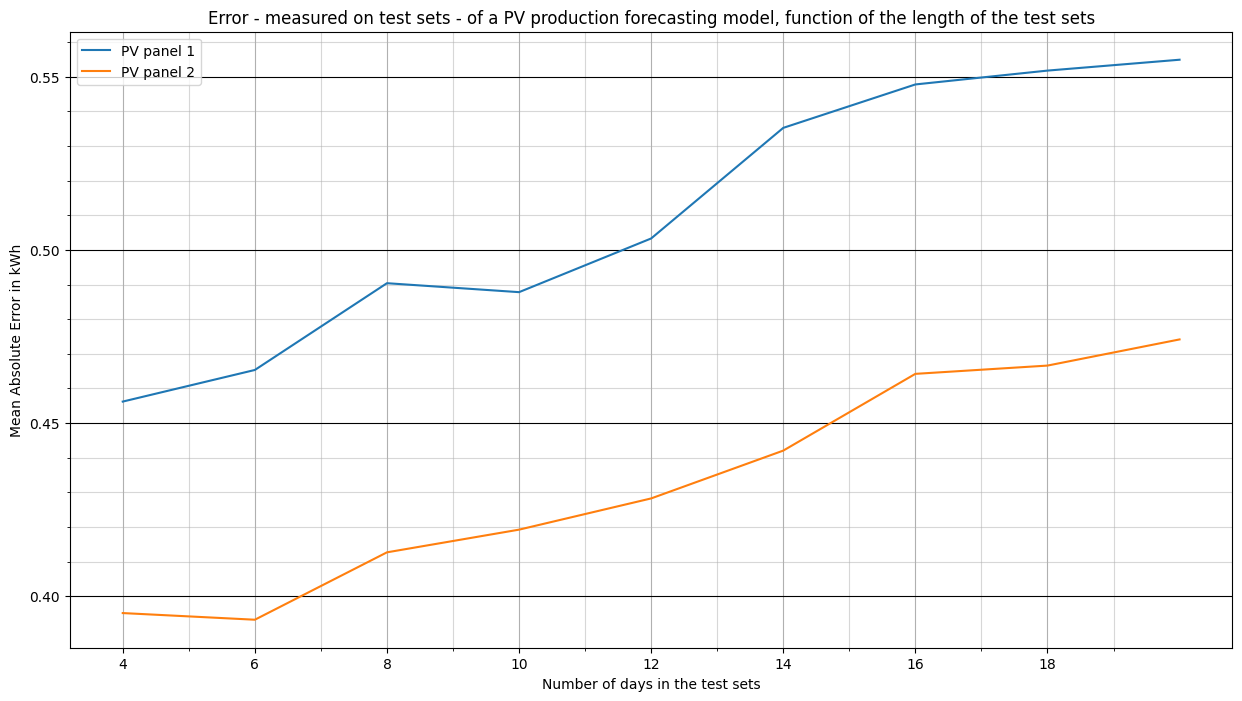

In [97]:
plt.figure(figsize=(15, 8))
plt.yticks(np.arange(0.4, 0.6, 0.05))
plt.yticks(np.arange(0.4, 0.6, 0.01), minor=True)
plt.xticks(range(3, 20), minor=True)
plt.xticks(range(4, 20, 2))
plt.grid(which="major", alpha=1)
plt.grid(which="major", color='black', axis="y", alpha=1)
plt.grid(which="minor", alpha=0.5)
plt.plot(list(maes2.keys())[1:], [np.mean(i) for i in list(maes2.values())[1:]], label="PV panel 1")
plt.plot(list(maes1.keys())[1:], [np.mean(i) for i in list(maes1.values())[1:]], label="PV panel 2")
plt.xlabel("Number of days in the test sets")
plt.ylabel("Mean Absolute Error in kWh")
plt.title("Error - measured on test sets - of a PV production forecasting model, function of the length of the test sets")
plt.legend()
plt.show()

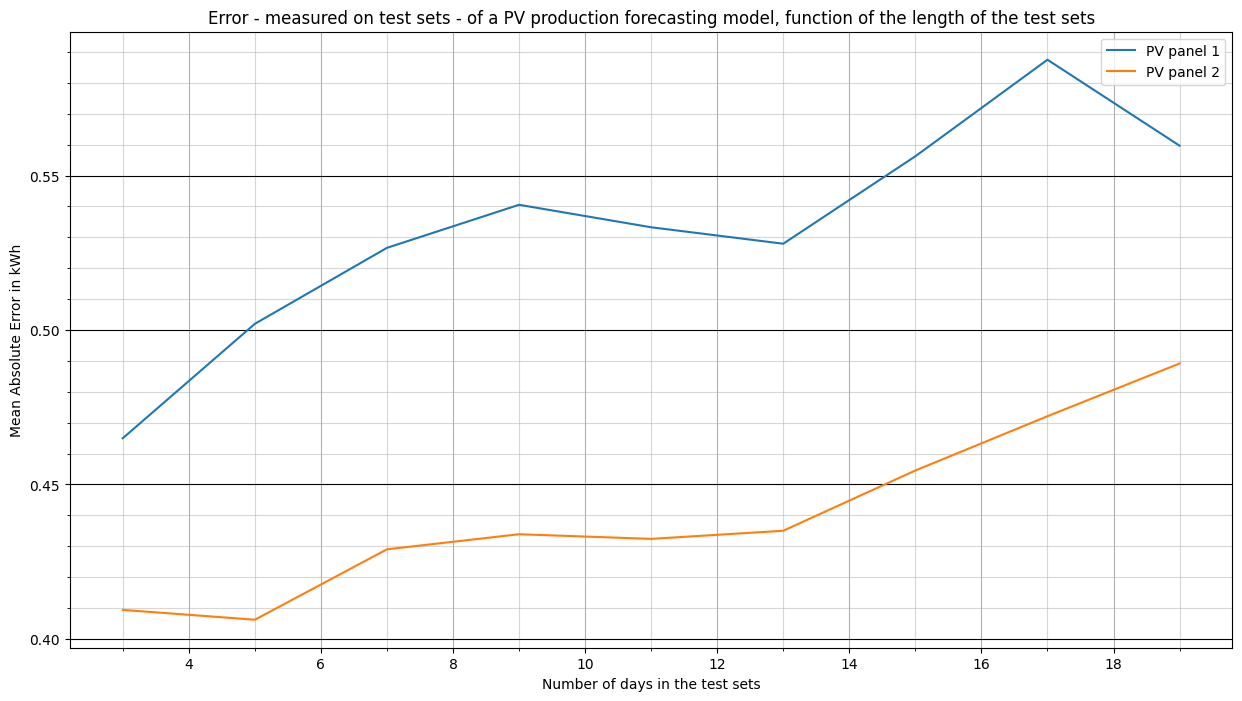

In [92]:
plt.figure(figsize=(15, 8))
plt.yticks(np.arange(0.4, 0.6, 0.05))
plt.yticks(np.arange(0.4, 0.6, 0.01), minor=True)
plt.xticks(range(3, 20), minor=True)
plt.xticks(range(4, 20, 2))
plt.grid(which="major", alpha=1)
plt.grid(which="major", color='black', axis="y", alpha=1)
plt.grid(which="minor", alpha=0.5)
plt.plot(list(maes2.keys())[1:], [np.mean(i) for i in list(maes2.values())[1:]], label="PV panel 1")
plt.plot(list(maes1.keys())[1:], [np.mean(i) for i in list(maes1.values())[1:]], label="PV panel 2")
plt.xlabel("Number of days in the test sets")
plt.ylabel("Mean Absolute Error in kWh")
plt.title("Error - measured on test sets - of a PV production forecasting model, function of the length of the test sets")
plt.legend()
plt.show()